<a href="https://colab.research.google.com/github/susanjax/project1/blob/main/physical_properties_of_NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install rdkit
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.1 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=aac7fe6df3acd8bae0068d09445c2a6fbdb01f8268c27035754ab2856cb2a09a
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [9]:
import pandas as pd
from rdkit import Chem


In [3]:
data = pd.read_csv('/content/drive/MyDrive/toxicity_project/data/other/material_CID.csv')
data

,material,CID
0,SiO2,24261
1,Fe3O4,16211978
2,Ag,23954
3,TiO2,26042
4,Au,23985
5,ZnO,14806
6,Pt,23939
7,CuO,14829
8,CeO2,73963
9,Co3O4,6432046


In [4]:
material = data['material']
list_of_material = material.unique().tolist()
print(list_of_material)

['SiO2', 'Fe3O4', 'Ag', 'TiO2', 'Au', 'ZnO', 'Pt', 'CuO', 'CeO2', 'Co3O4', 'C', 'Ca(HCO3)2', 'MgO', 'Ni', 'Al2O3', 'ZrO2', 'NiO', 'Cu', 'Bi2O3', 'Fe2O3', 'Mn2O3', 'CoO', 'Gd2O3', 'HfO2', 'In2O3', 'La2O3', 'Sb2O3']


In [10]:
 import pubchempy as pcp
 from pubchempy import *

In [6]:
CID = []
cmp = list_of_material
for np in cmp:
  for compound in get_compounds(np, 'name'):
    CID.append(compound.cid)
print(CID)

[24261, 16211978, 23954, 26042, 23985, 14806, 23939, 14829, 73963, 5462310, 935, 62395, 938, 23978, 14776, 3280778, 16684270]


In [7]:
CID = data['CID']
CID.tolist()

[24261,
 16211978,
 23954,
 26042,
 23985,
 14806,
 23939,
 14829,
 73963,
 6432046,
 5462310,
 10176262,
 14792,
 935,
 9989226,
 62395,
 14805,
 23978,
 14776,
 4413471,
 14824,
 9942118,
 159427,
 292779,
 510906,
 3280778,
 27652]

In [8]:
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
def descriptors(CID):
  mol_form = []
  mol_wt = []
  smile = []
  valance_electron = []
  for cid in CID:
    c = Compound.from_cid(cid)
    mol_wt.append(c.molecular_weight)
    smile.append(c.canonical_smiles)
    valance_electron.append(Descriptors.NumValenceElectrons(Chem.MolFromSmiles(c.canonical_smiles)))
    mol_form.append(c.molecular_formula)
  # d = {'material':mol_form,'Molecular_weight': mol_wt, 'Canonical_smiles':smile, 'Valance_electron':valance_electron}
  d = {'Molecular_weight': mol_wt, 'Canonical_smiles':smile, 'Valance_electron':valance_electron}
  new = pd.DataFrame(data = d)
  return new

In [9]:
new_d = descriptors(CID)


PubChemHTTPError: ignored

In [ ]:
new_d.info()

In [ ]:
data.info()

In [ ]:
whole = pd.concat([data, new_d],axis=1, join="inner")
whole

In [ ]:
# whole.to_csv('/content/drive/MyDrive/toxicity_project/data/material_with_molecularwt_smile_valancee.csv')

In [10]:
whole_data = pd.read_csv('/content/drive/MyDrive/toxicity_project/data/material_with_molecularwt_smile_valancee.csv')

In [ ]:
'''
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles(c.canonical_smiles)
print(c)
print(c.canonical_smiles)
print(m)
print(Descriptors.MolWt(m)) #molecular_wt
print(Descriptors.NumValenceElectrons(Chem.MolFromSmiles(c.canonical_smiles)))
Descriptors.NumValenceElectrons(Chem.MolFromSmiles('CC'))

'''


In [11]:
keys = whole_data['material'].values.tolist()
values = whole_data['Canonical_smiles'].values.tolist()
dict_material = {}
for key in keys: 
  for value in values:
    dict_material[key] = value
    values.remove(value)
    break



In [12]:
dict_material

{'SiO2': 'O=[Si]=O',
 'Fe3O4': 'O=[Fe].O=[Fe]O[Fe]=O',
 'Ag': '[Ag]',
 'TiO2': 'O=[Ti]=O',
 'Au': '[Au]',
 'ZnO': 'O=[Zn]',
 'Pt': '[Pt]',
 'CuO': 'O=[Cu]',
 'CeO2': 'O=[Ce]=O',
 'Co3O4': '[O-2].[O-2].[O-2].[O-2].[Co+2].[Co+3].[Co+3]',
 'C': '[C]',
 'Ca(HCO3)2': 'C(=O)(O)[O-].C(=O)(O)[O-].[Ca+2]',
 'MgO': 'O=[Mg]',
 'Ni': '[Ni]',
 'Al2O3': '[O-2].[O-2].[O-2].[Al+3].[Al+3]',
 'ZrO2': 'O=[Zr]=O',
 'NiO': 'O=[Ni]',
 'Cu': '[Cu]',
 'Bi2O3': 'O=[Bi]O[Bi]=O',
 'Fe2O3': 'CCC1(CC2=CC=CC=C2C3=C1C(=O)N=C(N3)SCC)C',
 'Mn2O3': 'O=[Mn]O[Mn]=O',
 'CoO': '[O-2].[Co+2]',
 'Gd2O3': '[O-2].[O-2].[O-2].[Gd+3].[Gd+3]',
 'HfO2': 'O=[Hf]=O',
 'In2O3': 'C1=C(C(=CN2C1=NC(=C2COCCCO)Cl)Cl)Cl',
 'La2O3': 'O=[La]O[La]=O',
 'Sb2O3': 'O=[Sb]O[Sb]=O'}

In [13]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors


descriptor_names = list(rdMolDescriptors.Properties.GetAvailableProperties())
get_descriptors = rdMolDescriptors.Properties(descriptor_names)
num_descriptors = len(descriptor_names)


descriptors_set = np.empty((0, num_descriptors), float)

for _, value in dict_material.items():
    molecule = Chem.MolFromSmiles(value)
    descriptors = np.array(get_descriptors.ComputeProperties(molecule)).reshape((-1,num_descriptors))
    descriptors_set = np.append(descriptors_set, descriptors, axis=0)




In [15]:
df = pd.DataFrame(descriptors_set, columns= descriptor_names)
combinedd = pd.concat([whole_data, df], axis =1, join='inner')
combinedd

,Unnamed: 0,material,CID,Molecular_weight,Canonical_smiles,Valance_electron,exactmw,amw,lipinskiHBA,lipinskiHBD,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,0,SiO2,24261,60.08400,O=[Si]=O,16,59.966756,60.084,2.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
1,1,Fe3O4,16211978,231.53000,O=[Fe].O=[Fe]O[Fe]=O,48,231.784471,231.531,4.0,0.0,...,2.693653,0.721688,0.041667,0.041667,0.008505,0.918442,10.820356,15.783243,19.649943,24.397187
2,2,Ag,23954,107.86800,[Ag],11,106.905097,107.868,0.0,0.0,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.740260,1.740260,0.091137,2.143769,0.158602
3,3,TiO2,26042,79.86600,O=[Ti]=O,16,79.937776,79.865,2.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.314286,3.314286,2.314286,2.314286,2.556735
4,4,Au,23985,196.96657,[Au],11,196.966569,196.967,0.0,0.0,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.740260,1.740260,0.091137,2.143769,0.158602
5,5,ZnO,14806,81.40000,O=[Zn],8,79.924057,81.389,1.0,0.0,...,1.115355,0.288675,0.000000,0.000000,0.000000,0.423377,2.423377,1.423377,0.785340,1.724689
6,6,Pt,23939,195.08000,[Pt],10,194.964791,195.078,0.0,0.0,...,0.316228,0.000000,0.000000,0.000000,0.000000,0.688312,1.688312,0.141142,2.499632,0.238291
7,7,CuO,14829,79.55000,O=[Cu],17,78.924512,79.545,1.0,0.0,...,0.709760,0.123091,0.000000,0.000000,0.000000,0.319481,2.319481,1.319481,1.449562,1.530255
8,8,CeO2,73963,172.11500,O=[Ce]=O,16,171.895268,172.114,2.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.976623,3.976623,2.976623,2.976623,3.945637
9,9,Co3O4,6432046,240.79700,[O-2].[O-2].[O-2].[O-2].[Co+2].[Co+3].[Co+3],51,240.779243,240.795,4.0,0.0,...,2.632993,0.000000,0.000000,0.000000,0.000000,1.359481,244.978309,161.043969,114.379074,5636.039883


In [16]:
combinedd.iloc[0]

Unnamed: 0                                 0
material                                SiO2
CID                                    24261
Molecular_weight                      60.084
Canonical_smiles                    O=[Si]=O
Valance_electron                          16
exactmw                            59.966756
amw                                   60.084
lipinskiHBA                              2.0
lipinskiHBD                              0.0
NumRotatableBonds                        0.0
NumHBD                                   0.0
NumHBA                                   2.0
NumHeavyAtoms                            3.0
NumAtoms                                 3.0
NumHeteroatoms                           3.0
NumAmideBonds                            0.0
FractionCSP3                             0.0
NumRings                                 0.0
NumAromaticRings                         0.0
NumAliphaticRings                        0.0
NumSaturatedRings                        0.0
NumHeteroc

In [17]:
comb = combinedd.drop(['Molecular_weight', 'exactmw'], axis=1)
comb

,Unnamed: 0,material,CID,Canonical_smiles,Valance_electron,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,0,SiO2,24261,O=[Si]=O,16,60.084,2.0,0.0,0.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
1,1,Fe3O4,16211978,O=[Fe].O=[Fe]O[Fe]=O,48,231.531,4.0,0.0,2.0,0.0,...,2.693653,0.721688,0.041667,0.041667,0.008505,0.918442,10.820356,15.783243,19.649943,24.397187
2,2,Ag,23954,[Ag],11,107.868,0.0,0.0,0.0,0.0,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.740260,1.740260,0.091137,2.143769,0.158602
3,3,TiO2,26042,O=[Ti]=O,16,79.865,2.0,0.0,0.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.314286,3.314286,2.314286,2.314286,2.556735
4,4,Au,23985,[Au],11,196.967,0.0,0.0,0.0,0.0,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.740260,1.740260,0.091137,2.143769,0.158602
5,5,ZnO,14806,O=[Zn],8,81.389,1.0,0.0,0.0,0.0,...,1.115355,0.288675,0.000000,0.000000,0.000000,0.423377,2.423377,1.423377,0.785340,1.724689
6,6,Pt,23939,[Pt],10,195.078,0.0,0.0,0.0,0.0,...,0.316228,0.000000,0.000000,0.000000,0.000000,0.688312,1.688312,0.141142,2.499632,0.238291
7,7,CuO,14829,O=[Cu],17,79.545,1.0,0.0,0.0,0.0,...,0.709760,0.123091,0.000000,0.000000,0.000000,0.319481,2.319481,1.319481,1.449562,1.530255
8,8,CeO2,73963,O=[Ce]=O,16,172.114,2.0,0.0,0.0,0.0,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.976623,3.976623,2.976623,2.976623,3.945637
9,9,Co3O4,6432046,[O-2].[O-2].[O-2].[O-2].[Co+2].[Co+3].[Co+3],51,240.795,4.0,0.0,0.0,0.0,...,2.632993,0.000000,0.000000,0.000000,0.000000,1.359481,244.978309,161.043969,114.379074,5636.039883


In [18]:
comb.describe()

,Unnamed: 0,CID,Valance_electron,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
count,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,13.000000,2.491527e+06,26.888889,169.661296,2.000000,0.148148,0.666667,0.148148,1.518519,4.555556,...,2.131788,0.765033,0.265382,0.265382,0.175585,0.587595,22.121284,13.253511,251.993034,328.678598
std,7.937254,4.381974e+06,25.606990,114.812369,1.568929,0.456045,1.270978,0.456045,1.451004,4.822490,...,2.771564,1.682146,0.951131,0.951131,0.662287,0.765916,54.576248,34.067746,1257.279737,1190.070023
min,0.000000,9.350000e+02,4.000000,12.011000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.301511,0.000000,0.000000,0.000000,0.000000,-1.550000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,1.938400e+04,11.000000,77.238500,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.717118,0.000000,0.000000,0.000000,0.000000,0.316883,2.306494,1.306494,1.980326,1.506794
50%,13.000000,2.765200e+04,16.000000,157.873000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,1.316497,0.288675,0.000000,0.000000,0.000000,0.519481,3.483117,2.470130,2.499632,2.882995
75%,19.500000,3.847124e+06,30.000000,236.163000,3.000000,0.000000,1.000000,0.000000,3.000000,5.000000,...,2.249309,0.669451,0.020833,0.020833,0.004253,0.931688,12.360772,5.642449,5.261299,7.504247
max,26.000000,1.621198e+07,110.000000,465.957000,6.000000,2.000000,5.000000,2.000000,4.000000,21.000000,...,12.694432,7.446361,4.431146,4.431146,3.148320,2.529351,244.978309,161.043969,6541.990841,5636.039883


In [19]:
original_data = pd.read_csv('/content/drive/MyDrive/toxicity_project/results/model_accuracy/combined_dataset.csv')


In [20]:
original_data

,Unnamed: 0,Cell type,test,material,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,radii
0,0,PC12,MTT,SiO2,12,1.95,113.670,386.9,-35.9,7.407407,2.926667,-1.200,1.1
1,1,PC12,MTT,SiO2,12,3.90,97.265,386.9,-35.9,7.407407,2.926667,-1.200,1.1
2,2,PC12,MTT,SiO2,12,7.80,108.730,386.9,-35.9,7.407407,2.926667,-1.200,1.1
3,3,PC12,MTT,SiO2,12,15.60,98.451,386.9,-35.9,7.407407,2.926667,-1.200,1.1
4,4,PC12,MTT,SiO2,12,31.20,98.056,386.9,-35.9,7.407407,2.926667,-1.200,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3149,HepG2,CCK-8,CaHCO3,6,80.00,90.050,228.3,-10.7,2.193000,2.678333,-2.866,1.8
3150,3150,HepG2,CCK-8,CaHCO3,6,100.00,88.290,228.3,-10.7,2.193000,2.678333,-2.866,1.8
3151,3151,HepG2,CCK-8,CaHCO3,6,120.00,103.060,228.3,-10.7,2.193000,2.678333,-2.866,1.8
3152,3152,HepG2,CCK-8,CaHCO3,6,150.00,90.750,228.3,-10.7,2.193000,2.678333,-2.866,1.8


combination of new descriptors to the original data

In [21]:
original_data['material'] = original_data['material'].replace(['CaHCO3'], 'Ca(HCO3)2')

In [22]:
new_one = pd.merge(original_data, comb, on='material', how='inner')

In [11]:
new_one.to_csv('with_material_descriptors.csv')

NameError: ignored

In [13]:
new_one = pd.read_csv('with_material_descriptors.csv')

In [25]:
new_one.describe()

,Unnamed: 0,Unnamed: 0.1,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),mcd,electronegativity,rox,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,...,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000
mean,1576.500000,1576.500000,32.475587,93.921109,75.345387,87.062208,-4.795845,2.257006,2.544846,-0.008270,...,1.099203,0.254709,0.006394,0.006394,0.001305,0.474432,6.353998,4.600745,174.938906,57.815408
std,910.625701,910.625701,20.844330,176.391712,30.270625,147.911668,36.469655,2.598157,0.312824,1.113436,...,0.948724,0.308344,0.016041,0.016041,0.003274,0.409279,22.525664,13.553019,1040.452016,432.707138
min,0.000000,0.000000,2.000000,0.000000,0.000000,1.150000,-158.000000,0.000000,1.900000,-2.866000,...,0.301511,0.000000,0.000000,0.000000,0.000000,-0.200260,0.000000,0.000000,0.000000,0.000000
25%,788.250000,788.250000,24.000000,5.000000,57.310750,18.000000,-31.700000,0.000000,2.540000,-0.930000,...,0.301511,0.000000,0.000000,0.000000,0.000000,0.000000,1.740260,0.091137,1.816883,0.158602
50%,1576.500000,1576.500000,24.000000,30.000000,84.925000,30.000000,-10.700000,2.272727,2.550000,0.000000,...,0.709760,0.123091,0.000000,0.000000,0.000000,0.688312,2.319481,1.319481,2.143769,1.530255
75%,2364.750000,2364.750000,48.000000,100.000000,96.920500,81.800000,11.000000,2.932551,2.750000,0.799600,...,1.316497,0.408248,0.000000,0.000000,0.000000,0.740260,3.314286,2.314286,2.499632,2.556735
max,3153.000000,3153.000000,96.000000,1600.000000,234.630000,1073.500000,88.000000,7.407407,2.926667,1.692000,...,4.234527,1.263710,0.066667,0.066667,0.013608,1.359481,244.978309,161.043969,6541.990841,5636.039883


In [14]:
new_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       3154 non-null   int64  
 1   Unnamed: 0.1                     3154 non-null   int64  
 2   Cell type                        3154 non-null   object 
 3   test                             3154 non-null   object 
 4   material                         3154 non-null   object 
 5   time (hr)                        3154 non-null   int64  
 6   concentration (ug/ml)            3154 non-null   float64
 7   viability (%)                    3154 non-null   float64
 8   Hydrodynamic diameter (nm)       3154 non-null   float64
 9   Zeta potential (mV)              3154 non-null   float64
 10  mcd                              3154 non-null   float64
 11  electronegativity                3154 non-null   float64
 12  rox                 

drop rows with all same values

In [28]:
all_row_same_value = new_one.nunique()
cols_to_drop = all_row_same_value[all_row_same_value == 1].index
uniq = new_one.drop(cols_to_drop, axis=1)

In [29]:
uniq

,Unnamed: 0,Unnamed: 0.1,Cell type,test,material,time (hr),concentration (ug/ml),viability (%),Hydrodynamic diameter (nm),Zeta potential (mV),...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,0,0,PC12,MTT,SiO2,12,1.95,113.6700,386.9,-35.9,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
1,1,1,PC12,MTT,SiO2,12,3.90,97.2650,386.9,-35.9,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
2,2,2,PC12,MTT,SiO2,12,7.80,108.7300,386.9,-35.9,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
3,3,3,PC12,MTT,SiO2,12,15.60,98.4510,386.9,-35.9,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
4,4,4,PC12,MTT,SiO2,12,31.20,98.0560,386.9,-35.9,...,1.316497,0.408248,0.000000,0.000000,0.000000,-0.183117,2.816883,1.816883,1.816883,1.705982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3149,3097,A549,NRU,Bi2O3,6,0.00,100.0000,504.5,-10.7,...,2.119172,0.730297,0.066667,0.066667,0.013608,1.326234,6.326234,5.326234,5.326234,6.739000
3150,3150,3098,A549,NRU,Bi2O3,6,20.00,90.1695,504.5,-10.7,...,2.119172,0.730297,0.066667,0.066667,0.013608,1.326234,6.326234,5.326234,5.326234,6.739000
3151,3151,3099,A549,NRU,Bi2O3,6,40.00,103.6158,504.5,-10.7,...,2.119172,0.730297,0.066667,0.066667,0.013608,1.326234,6.326234,5.326234,5.326234,6.739000
3152,3152,3100,A549,NRU,Bi2O3,6,60.00,88.5876,504.5,-10.7,...,2.119172,0.730297,0.066667,0.066667,0.013608,1.326234,6.326234,5.326234,5.326234,6.739000


In [15]:
new_one['material'].unique()

array(['SiO2', 'Fe3O4', 'Ag', 'TiO2', 'Au', 'ZnO', 'Pt', 'CuO', 'CeO2',
       'Co3O4', 'C', 'Ca(HCO3)2', 'MgO', 'Ni', 'Al2O3', 'ZrO2', 'NiO',
       'Cu', 'Bi2O3'], dtype=object)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
new_one.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Cell type', 'test', 'material',
       'time (hr)', 'concentration (ug/ml)', 'viability (%)',
       'Hydrodynamic diameter (nm)', 'Zeta potential (mV)', 'mcd',
       'electronegativity', 'rox', 'radii', 'CID', 'Canonical_smiles',
       'Valance_electron', 'amw', 'lipinskiHBA', 'lipinskiHBD',
       'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms',
       'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings',
       'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings',
       'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n',
       'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2',
       'kappa3', 'Phi'],
      

In [18]:
neww=new_one.corr().dropna(axis=0, how= 'all')

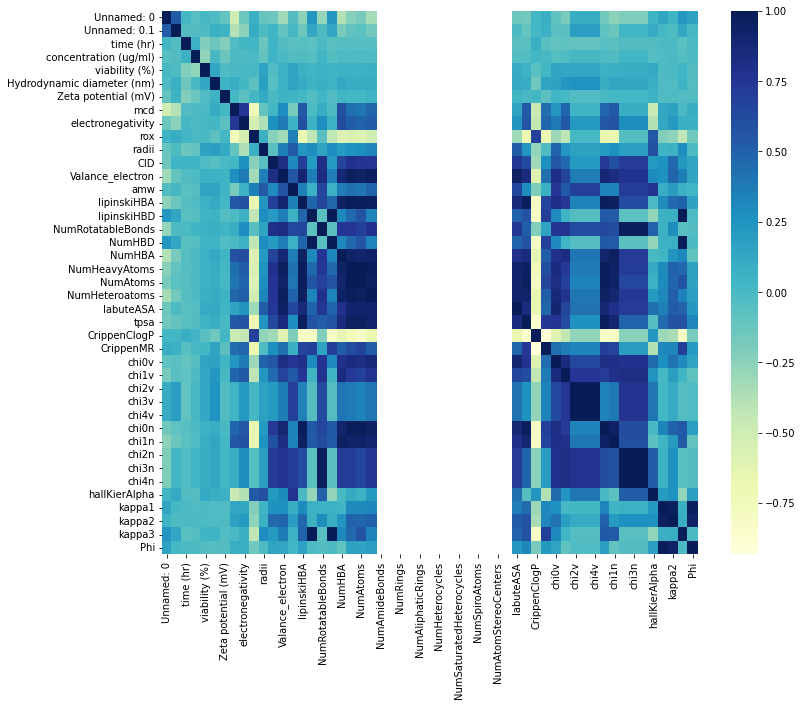

In [19]:
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(neww, cmap='YlGnBu')
plt.savefig('heatmap_of_correlation.png')

In [20]:
type(neww)

pandas.core.frame.DataFrame

In [24]:
neww.iloc[4,:]


Unnamed: 0                         0.015577
Unnamed: 0.1                      -0.013843
time (hr)                         -0.208478
concentration (ug/ml)             -0.261478
viability (%)                      1.000000
Hydrodynamic diameter (nm)         0.136089
Zeta potential (mV)               -0.025885
mcd                                0.002360
electronegativity                  0.008292
rox                                0.007646
radii                              0.167951
CID                               -0.024920
Valance_electron                   0.066865
amw                                0.155521
lipinskiHBA                        0.064271
lipinskiHBD                        0.036452
NumRotatableBonds                  0.067492
NumHBD                             0.036452
NumHBA                             0.071286
NumHeavyAtoms                      0.061855
NumAtoms                           0.062447
NumHeteroatoms                     0.077991
NumAmideBonds                   

In [ ]:
newo

In [22]:
newo=neww.drop(['FractionCSP3','NumRings','NumAmideBonds', 'NumAromaticRings', 'NumAliphaticRings',
       'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters'], axis=1)

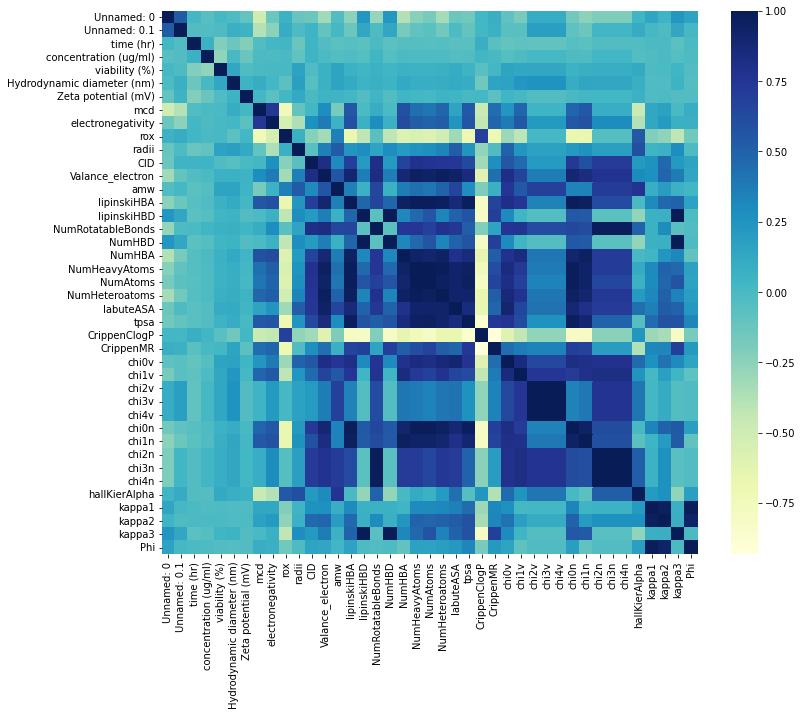

In [23]:
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(newo, cmap='YlGnBu')
plt.savefig('heatmap_of_correlation.png')